<a href="https://colab.research.google.com/github/rayymhra/first-flutter-project/blob/master/first_tensorflow_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf               # for models and predictions
import numpy as np                    # for numeric operation
from PIL import Image, ImageOps       # for processing image
import matplotlib.pyplot as plt       # for displaying the image
from google.colab import files        # for uploading the file in google colab

In [4]:
# function to create model MobileNetV2 with pre-trained weight from ImageNet
def load_model():
  model = tf.keras.applications.MobileNetV2(weights='imagenet')
  return model

In [5]:
# function to preprocessing the image
def preprocess_image(image):
  image = image.resize((224, 224))
  image_array = np.array(image)

  if image_array.shape[-1] == 4:
    image_array = image_array[..., :3]
    processed_image = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
    processed_image = np.expand_dims(processed_image, axis=0)
    return processed_image
  else:
    processed_image = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
    processed_image = np.expand_dims(processed_image, axis=0)
    return processed_image

In [6]:
model = load_model()
print("MobileNetV2 Model successfuly loaded")

print("Please upload a picure (format: jpg, jpeg, or png)")
uploaded = files.upload()

MobileNetV2 Model successfuly loaded
Please upload a picure (format: jpg, jpeg, or png)


Saving gitarr.jpeg to gitarr.jpeg


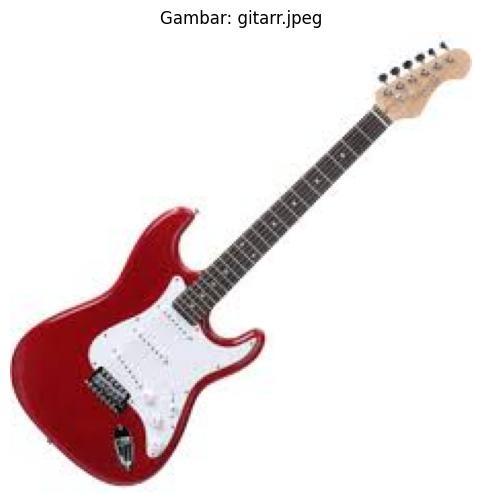

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
### Hasil Prediksi untuk gitarr.jpeg ###
1. electric_guitar (90.31%)
2. acoustic_guitar (3.93%)
3. pick (0.13%)


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def preprocess_image(img):
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

for filename in uploaded.keys():
    image = Image.open(filename)

    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.title(f"Gambar: {filename}")
    plt.axis("off")
    plt.show()

    processed_img = preprocess_image(image)
    predictions = model.predict(processed_img)

    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

    print(f"### Hasil Prediksi untuk {filename} ###")
    for i, (imagenet_id, label, confidence) in enumerate(decoded_predictions):
        print(f"{i+1}. {label} ({confidence*100:.2f}%)")